<a href="https://colab.research.google.com/github/agumas-atnaf-10/Countdown-Timer/blob/main/Mental_Health_and_Happiness_Index_Analysis_Among_Indian_Youth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn plotly scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()


,tech_company,benefits,workplace_resources,mh_employer_discussion,mh_coworker_discussion,medical_coverage,mental_health,mh_share,age,gender,country
0,Yes,No,I don't know,No,Yes,Yes,Possibly,5,27.0,Female,United Kingdom
1,Yes,Yes,No,No,Yes,Yes,Possibly,4,31.0,Male,United Kingdom
2,Yes,I don't know,No,Yes,Yes,No,Yes,5,36.0,Male,United States of America
3,Yes,Yes,I don't know,Yes,Yes,Yes,Yes,10,22.0,Male,United States of America
4,Yes,Yes,No,No,Yes,Yes,Yes,8,36.0,Female,United States of America


In [ ]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df = df.replace({
    "I don't know": "Unknown",
    "Don't Know": "Unknown",
    "dont know": "Unknown",
    "Possibly": "Possibly",
})


/tmp/ipython-input-3956863162.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
df['country'] = df['country'].replace({
    "United States of America": "USA",
    "United Kingdom": "UK"
})


In [ ]:
def compute_happiness(row):
    score = 0

    # mh_share scale (1–10)
    score += row['mh_share'] * 5

    # Positive indicators
    positive_cols = ['benefits', 'medical_coverage', 'workplace_resources']
    for col in positive_cols:
        if row[col] == "Yes": score += 10

    # Negative indicators
    if row['mental_health'] in ["Yes", "Possibly"]:
        score -= 10

    return max(0, min(100, score))

df['Happiness_Index'] = df.apply(compute_happiness, axis=1)
df.head()


,tech_company,benefits,workplace_resources,mh_employer_discussion,mh_coworker_discussion,medical_coverage,mental_health,mh_share,age,gender,country,Happiness_Index
0,Yes,No,Unknown,No,Yes,Yes,Possibly,5,27.0,Female,UK,25
1,Yes,Yes,No,No,Yes,Yes,Possibly,4,31.0,Male,UK,30
2,Yes,Unknown,No,Yes,Yes,No,Yes,5,36.0,Male,USA,15
3,Yes,Yes,Unknown,Yes,Yes,Yes,Yes,10,22.0,Male,USA,60
4,Yes,Yes,No,No,Yes,Yes,Yes,8,36.0,Female,USA,50


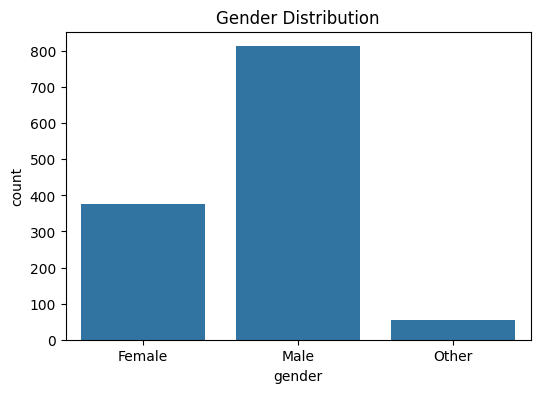

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender')
plt.title("Gender Distribution")
plt.show()


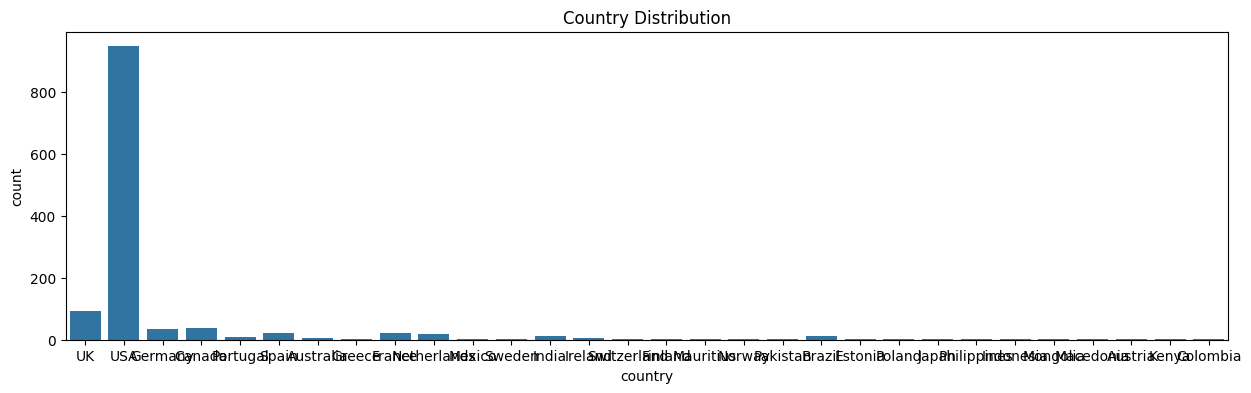

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x='country')
plt.title("Country Distribution")
plt.show()


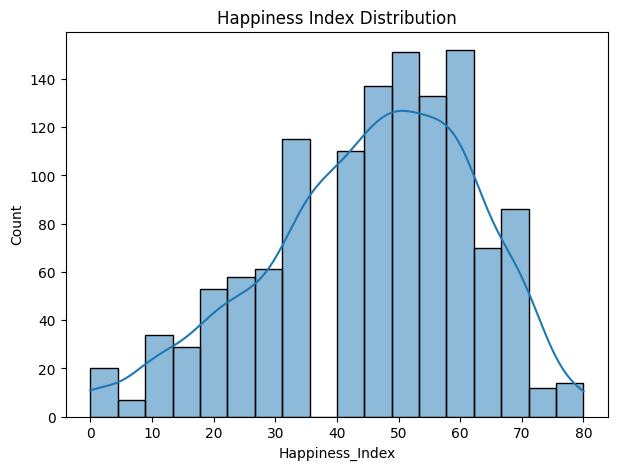

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df['Happiness_Index'], kde=True)
plt.title("Happiness Index Distribution")
plt.show()


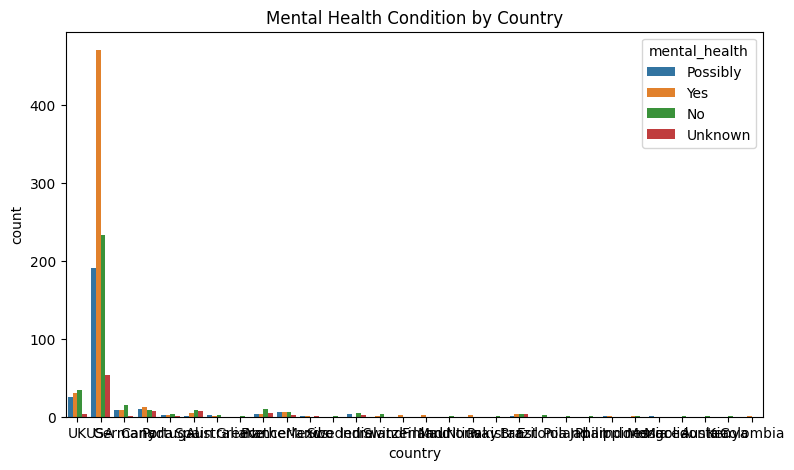

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(data=df, x='country', hue='mental_health')
plt.title("Mental Health Condition by Country")
plt.show()


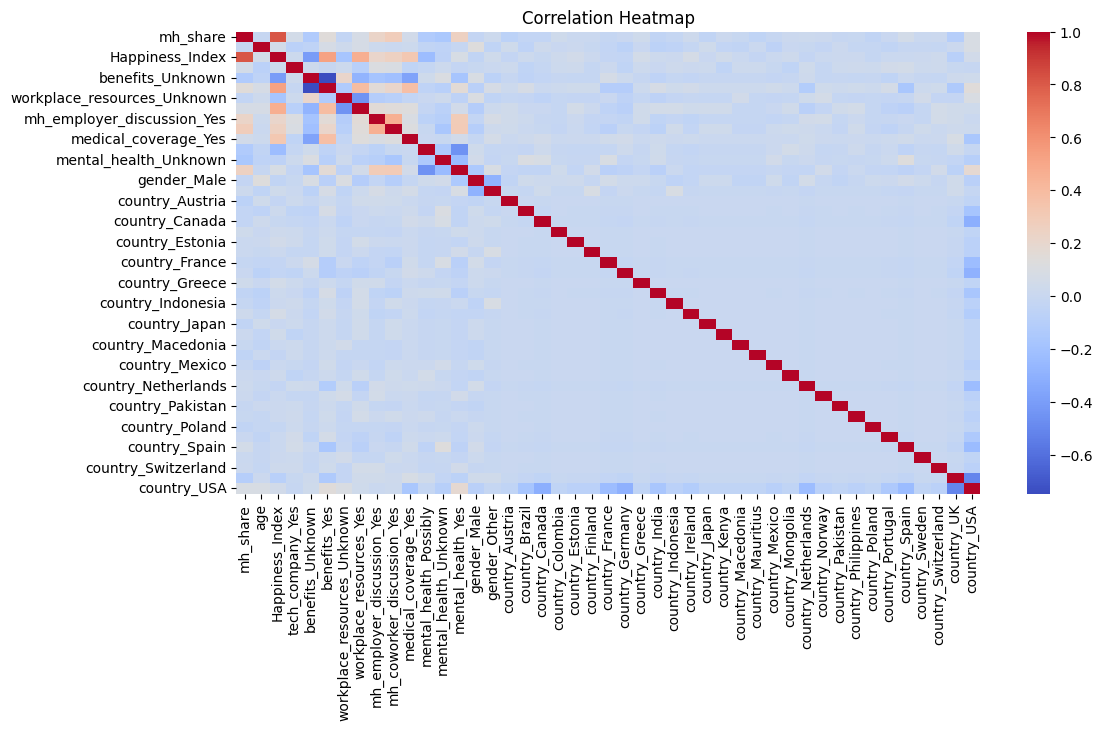

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(12,6))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


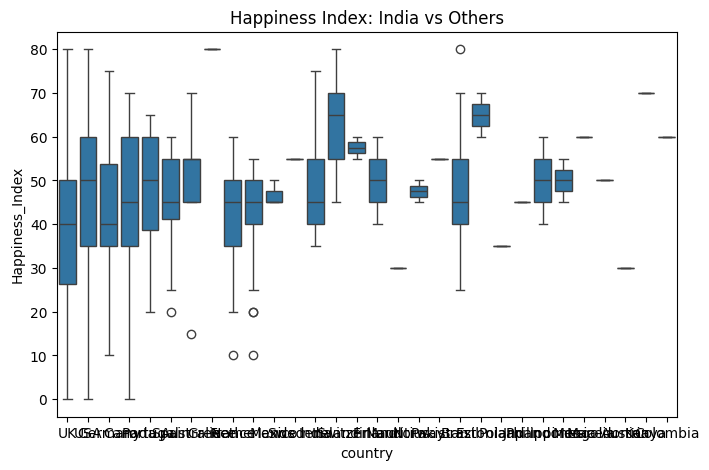

In [ ]:
if "India" in df['country'].unique():
    plt.figure(figsize=(30,5))
    sns.boxplot(data=df, x='country', y='Happiness_Index')
    plt.title("Happiness Index: India vs Others")
    plt.show()
else:
    print("Note: No Indian respondents in this dataset.")
